#chap_2 challenge

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%load_ext watermark
%watermark -a 'Kelompok K' -v -p numpy,pandas,matplotlib,seaborn

##Mengimport dataset kedalam colab
Tahap pertama, kita akan mengupload dataset yang telah di unduh kedalam google colab. Library yang digunakan adalah library `google.colab` dan `module drive`


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Setelah kita berhasil menghubungkan google colab dengan google drive, langkah selanjutnya adalah kita mengimport dataset tersebut menggunakan Library `Pandas` untuk melakukan manipulasi data. Pastikan data tersebut sudah di upload ke dalam google drive anda dan pastikan ketika memasukan directory file harus sesuai dengan file tersebut di google drive.

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/C2_Data Train.csv')
pd.set_option('display.max_column', None) #See all the columns without turncated
#data #call data variable

>Tujuan

prediksi customer churn untuk mempertahankan pelanggan.


##Data Understanding
Mencari insight untuk keperluan bisnis dan modeling
Penerapan EDA. Ada baiknya untuk melihat data dengan cara berikut:

In [7]:
#Opsi untuk melihat 10 data teratas
data.head(10)

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   
5    MO             147  area_code_415                yes              no   
6    LA             117  area_code_408                 no              no   
7    WV             141  area_code_415                yes             yes   
8    IN              65  area_code_415                 no              no   
9    RI              74  area_code_415                 no              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   
5                      0              157.0               79   
6                      0              184.5               97   
7                     37              258.6               84   
8                      0              129.1              137   
9                      0              187.7              127   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   
5             26.69              103.1               94              8.76   
6             31.37              351.6               80             29.89   
7             43.96              222.0              111             18.87   
8             21.95              228.5               83             19.42   
9             31.91              163.4              148             13.89   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   
5                211.8                 96                9.53   
6                215.8                 90                9.71   
7                326.4                 97               14.69   
8                208.8                111                9.40   
9                196.0                 94                8.82   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   
5                 7.1                 6               1.92   
6                 8.7                 4               2.35   
7                11.2                 5               3.02   
8                12.7                 6               3.43   
9                 9.1                 5               2.46   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no

In [8]:
#Opsi untuk melihat 10 data terbawah
data.tail(10)

state  account_length      area_code international_plan voice_mail_plan  \
4240    AR             127  area_code_415                 no             yes   
4241    WA              80  area_code_510                 no              no   
4242    MN             150  area_code_408                 no              no   
4243    ND             140  area_code_510                 no              no   
4244    AZ              97  area_code_510                 no              no   
4245    MT              83  area_code_415                 no              no   
4246    WV              73  area_code_408                 no              no   
4247    NC              75  area_code_408                 no              no   
4248    HI              50  area_code_408                 no             yes   
4249    VT              86  area_code_415                 no             yes   

      number_vmail_messages  total_day_minutes  total_day_calls  \
4240                     27              157.6              107   
4241                      0              157.0              101   
4242                      0              170.0              115   
4243                      0              244.7              115   
4244                      0              252.6               89   
4245                      0              188.3               70   
4246                      0              177.9               89   
4247                      0              170.7              101   
4248                     40              235.7              127   
4249                     34              129.4              102   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
4240             26.79              280.6               49             23.85   
4241             26.69              208.8              127             17.75   
4242             28.90              162.7              138             13.83   
4243             41.60              258.6              101             21.98   
4244             42.94              340.3               91             28.93   
4245             32.01              243.8               88             20.72   
4246             30.24              131.2               82             11.15   
4247             29.02              193.1              126             16.41   
4248             40.07              223.0              126             18.96   
4249             22.00              267.1              104             22.70   

      total_night_minutes  total_night_calls  total_night_charge  \
4240                 75.1                 77                3.38   
4241                113.3                109                5.10   
4242                267.2                 77               12.02   
4243                231.3                112               10.41   
4244                256.5                 67               11.54   
4245                213.7                 79                9.62   
4246                186.2                 89                8.38   
4247                129.1                104                5.81   
4248                297.5                116               13.39   
4249                154.8                100                6.97   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
4240                 8.0                 4               2.16   
4241                16.2                 2               4.37   
4242                 8.3                 2               2.24   
4243                 7.5                 6               2.03   
4244                 8.8                 5               2.38   
4245                10.3                 6               2.78   
4246                11.5                 6               3.11   
4247                 6.9                 7               1.86   
4248                 9.9                 5               2.67   
4249                 9.3                16               2.51   

      number_customer_service_calls chur

####Descriptive Statistics

Memeriksa kolom-kolom dan nilai hilang dengan `df.info()`
merupakan hal pertama yang biasanya dilakukan dalam EDA adalah mengecek tipe data setiap kolom dan jumlah nilai yang hilang. Hal ini bisa kita lakukan dengan menggunakan `df.info().` 


untuk alternatif dapat menggunakan `data.isna().sum()` dan juga mencari duplikat dengan `data.duplicated().sum`

In [9]:
#cek miss
data.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [10]:
#cek duplicate
data.duplicated().sum()

0

In [11]:
#Melihat dimensi data
data.shape

(4250, 20)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

* state: US State
* account_length: Total bulan customer menjadi user telco provider
* area_code: Kode Area
* International_plan: Customer memiliki plan international
* voice mail plan: Customer memiliki plan voice mail
* number_vmail messages: Total pesan voice mail
* total_day_minutes: Total minutes pada day calls
* total_day_calls: Total day calls
* total_day_charge: Total charge dari day calls
* total_eve_minutes: Total menil pada evening call
* total_eve_calls: Total evening call
* total_eve_charge: Total charge pada evening call
* total_night_minutes: Total menit pada night call
* total_night_calls: Total night call
* total_night_charge: Total charge pada night call
* total_int_minutes: Total menit pada international call
* total_intl_calls: Total international call
* total_int_charge: Total charge pada international call
* number_customer_service_calls: Total call kepada customer service
* churn: Customer churn




kita dapat melihat bahwa:

* Dataframe memiliki total 4250 baris dan 20 kolom
* Dataframe tidak memiliki null values di setiap kolomnya
* Target klasifikasi adalah kolom churn dengan tipe data object
* ada 3 dtype: float64(8), int64(7), object(5)

Berarti sisanya adalah feature (predictor)
Dari informasi di atas, kita bisa pisahkan kolom kategorical dan numerical sebagai berikut:

In [13]:
print(data.nunique().values)
print(data.columns)

[  51  215    3    2    2   46 1843  120 1843 1773  123 1572 1757  128
  992  168   21  168   10    2]
Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')


In [14]:
nums = ['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']
cats = ['state','area_code','international_plan','voice_mail_plan']
#menyimpan nama kolom berdasarkan tipe numeric dan categorical seperti di atas
#tidak wajib, tapi ini lumayan akan memudahkan beberapa proses ke depannya.

> Sampling untuk memahami kembali data dengan df.sample()



Setelah mengetahui kolom apa saja yang ada di dalam dataset, kita lakukan sampling untuk memastikan apakah isi kolomnya sesuai ekspektasi. Biasakan lakukan ini beberapa kali karena seringkali apabila ada keanehan tidak akan keluar pada sampling pertama.

Sampling dapat dilakukan dengan menggunakan `df.sample()`

In [15]:
data.sample(5)

state  account_length      area_code international_plan voice_mail_plan  \
1735    SD             103  area_code_510                 no              no   
3631    DC              94  area_code_415                 no             yes   
3278    GA             162  area_code_408                 no             yes   
3934    CT              15  area_code_415                 no              no   
929     WY             151  area_code_510                 no              no   

      number_vmail_messages  total_day_minutes  total_day_calls  \
1735                      0              206.5              125   
3631                     31              209.3               90   
3278                     21              205.2              128   
3934                      0              185.1              103   
929                       0              235.9              104   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
1735             35.11              180.2              113             15.32   
3631             35.58              281.7              111             23.94   
3278             34.88              231.7              128             19.69   
3934             31.47              193.8              148             16.47   
929              40.10               80.6               91              6.85   

      total_night_minutes  total_night_calls  total_night_charge  \
1735                220.6                 95                9.93   
3631                190.1                 66                8.55   
3278                180.3                100                8.11   
3934                305.2                 79               13.73   
929                 212.8                116                9.58   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
1735                12.2                 4               3.29   
3631                 7.9                 5               2.13   
3278                10.6                 3               2.86   
3934                13.2                 6               3.56   
929                  5.8                 2               1.57   

      number_customer_service_calls churn  
1735                              3    no  
3631                              0    no  
3278                              2    no  
3934                              5    no  
929                               3    no

Beberapa pengamatan:
* Target kita, `churn` benar bertipe kategorik dengan *kategori* yes / no
* area_code / kode area bersifat kategorik dengan string
* Sepertinya tidak ada lagi yang aneh dengan input setiap kolom (sudah sesuai)

> Statistical summary dengan `df.describe()`
Selanjutnya kita munculkan ringkasan statistik dataframe, baik untuk numerical dan categorical. Hal ini dilakukan untuk mengecek secara singkat akan keberadaan outlier dan karakteristik distribusi untuk `feature` numeric.

In [16]:
data[nums].describe()
#data[nums].describe().T

account_length  number_vmail_messages  total_day_minutes  \
count     4250.000000            4250.000000        4250.000000   
mean       100.236235               7.631765         180.259600   
std         39.698401              13.439882          54.012373   
min          1.000000               0.000000           0.000000   
25%         73.000000               0.000000         143.325000   
50%        100.000000               0.000000         180.450000   
75%        127.000000              16.000000         216.200000   
max        243.000000              52.000000         351.500000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      4250.000000       4250.000000        4250.000000      4250.000000   
mean         99.907294         30.644682         200.173906       100.176471   
std          19.850817          9.182096          50.249518        19.908591   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.365000         165.925000        87.000000   
50%         100.000000         30.680000         200.700000       100.000000   
75%         113.000000         36.750000         233.775000       114.000000   
max         165.000000         59.760000         359.300000       170.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count       4250.000000          4250.000000        4250.000000   
mean          17.015012           200.527882          99.839529   
std            4.271212            50.353548          20.093220   
min            0.000000             0.000000           0.000000   
25%           14.102500           167.225000          86.000000   
50%           17.060000           200.450000         100.000000   
75%           19.867500           234.700000         113.000000   
max           30.540000           395.000000         175.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count         4250.000000         4250.000000       4250.000000   
mean             9.023892           10.256071          4.426353   
std              2.265922            2.760102          2.463069   
min              0.000000            0.000000          0.000000   
25%              7.522500            8.500000          3.000000   
50%              9.020000           10.300000          4.000000   
75%             10.560000           12.000000          6.000000   
max             17.770000           20.000000         20.000000   

       total_intl_charge  number_customer_service_calls  
count        4250.000000                    4250.000000  
mean            2.769654                       1.559059  
std             0.745204                       1.311434  
min             0.000000                       0.000000  
25%             2.300000                       1.000000  
50%             2.780000                       1.000000  
75%             3.240000                       2.000000  
max             5.400000                       9.000000

Beberapa pengamatan dari *statistical summary* kolom numerik di atas:
* Distribusi nilai di kebanyakan kolom  terlihat normal/simetrik (*mean* dan *median* cukup dekat, dan nilai Q2 kira-kira tepat di tengah Q1 - Q3)
* Sedangkan kolom `number_vmail_messages` tampaknya tidak simetrik, karena nilai perbedaan yang jauh mean > median


untuk segmen Quartile lebih mudah dilihat dengan chart.

In [17]:
data['churn'].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

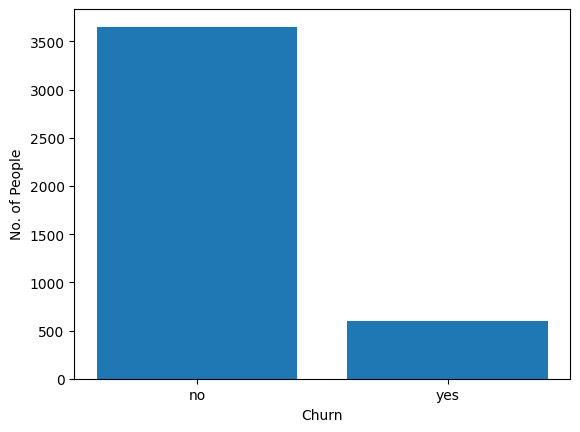

In [18]:
# Histogram untuk representasi churn
churn_count = data.groupby('churn').count()
plt.bar(churn_count.index, churn_count['total_day_minutes'])
plt.xlabel('Churn')
plt.ylabel('No. of People')
plt.show()

histogram diatas menunjukkan jumlah pengguna telekomunikasi yang telah melakukan churn dibandingkan dengan yang belum.

In [19]:
data[cats].describe()

state      area_code international_plan voice_mail_plan
count   4250           4250               4250            4250
unique    51              3                  2               2
top       WV  area_code_415                 no              no
freq     139           2108               3854            3138

Beberapa pengamatan dari *statistical summary* kolom kategorikal di atas:
* Mayoritas data adalah area_code_415 (Top kolom `area_code` adalah `area_code_415` dengan frekuensi 2108)
* Top kolom `international_plan` adalah `no` dengan frekuensi 3854
* Top kolom `voice_mail_plan` adalah `no` dengan frekuensi 3138.
* Nilai unique terbanyak terdapat pada kolom `State`;ada kemungkinan tidak terlalu berguna untuk menjadi predictor;Kolom `area_code` dan/atau kolom `state` bagian bersifat anomali, dan dapat dihilangkan.

In [20]:
# International Plan 
pd.crosstab(data['churn'], data['international_plan'], margins=True)

international_plan    no  yes   All
churn                              
no                  3423  229  3652
yes                  431  167   598
All                 3854  396  4250

In [23]:
from scipy.stats import chi2_contingency
intlplan_cont = pd.crosstab(data['churn'], data['international_plan'], margins=True)
stat, p, dof, expected = chi2_contingency(intlplan_cont)
# p-value
alpha = 0.05
print('p value is ' + str(p))
if p <= alpha:
    
    print('Dependent (reject H0)') 
    
else:
    print('Independent (H0 holds true)')

p value is 1.6766764419827653e-60
Dependent (reject H0)


> P-value<alpha

sehingga Rencana Internasional memiliki hubungan yang signifikan dengan tingkat churn. Jelas, mereka yang memilih Rencana Internasional memiliki peluang lebih besar untuk meninggalkan layanan perusahaan daripada mereka yang tidak memiliki Rencana Internasional(lebih jelasnya pada grafik dibawah). Mungkin pengeluaran yang besar dan tidak terkontrol dengan panggilan internasional sangat rawan konflik dan menyebabkan ketidakpuasan di antara pelanggan operator telekomunikasi.

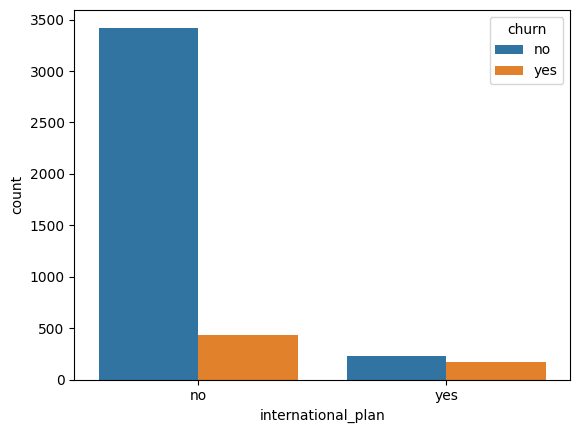

In [22]:
sns.countplot(x='international_plan', hue='churn', data=data);

lihat perbedaan yang tipis churn pengguna Rencana Internasional, kemungkinan terjadinya meniggalkan langganan sangat logis

In [38]:
from scipy.stats import chi2_contingency
vmplan_cont = pd.crosstab(data['churn'], data['voice_mail_plan'], margins=True)
stat, p, dof, expected = chi2_contingency(vmplan_cont)
# p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    
    print('Dependent (reject H0) \n', vmplan_cont)
    
else:
    print('Independent (H0 holds true)', vmplan_cont)

p value is 2.148058188336433e-11
Dependent (reject H0) 
 voice_mail_plan    no   yes   All
churn                            
no               2622  1030  3652
yes               516    82   598
All              3138  1112  4250


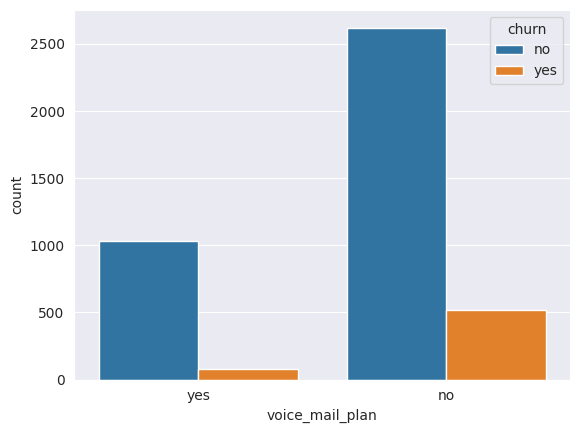

In [39]:
sns.countplot(x='voice_mail_plan', hue='churn', data=data);

walaupun dengan ada hubungan signifikan, terdapat gap yang cukup jauh pada pengguna dan non pengguna voice_mail_plan

bagimana untuk mereka yang melakukan customer service call? berikut untuk jawabannya

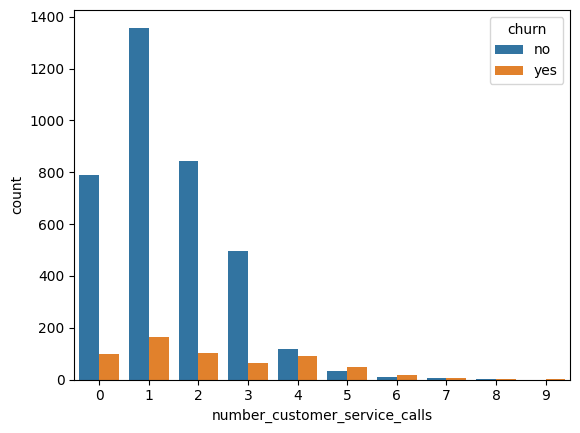

In [30]:
sns.countplot(x='number_customer_service_calls', hue='churn', data=data);

Gambar tersebut dengan jelas menyatakan bahwa churn rate meningkat tajam mulai dari 4 panggilan ke pusat layanan. Pelanggan yang menelepon layanan pelanggan tiga kali atau lebih sedikit memiliki tingkat churn yang jauh lebih rendah daripada pelanggan yang menelepon layanan pelanggan empat kali atau lebih.

### Univariate Analysis
Setelah melakukan analisis sederhana tentang statistik deskriptif, sekarang kita fokus pada satu-persatu kolom dengan *Univariate Analysis*

> Box plots

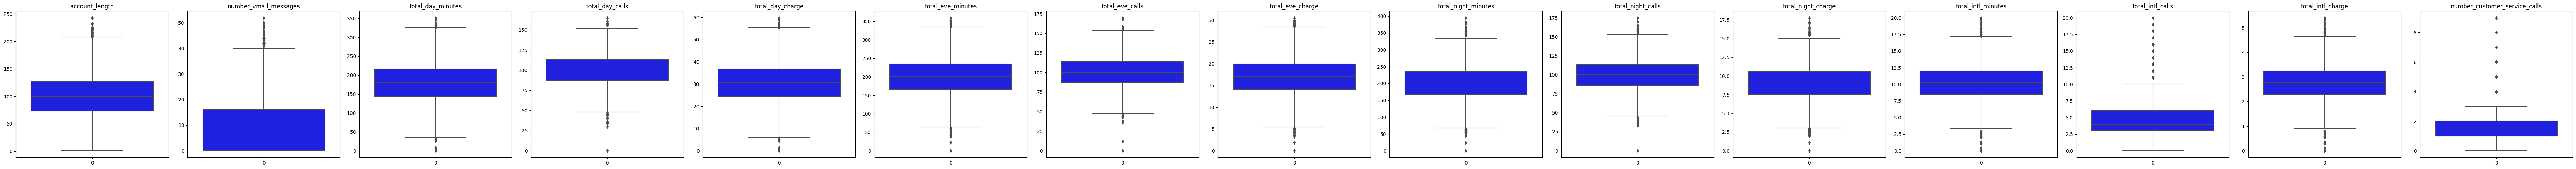

In [31]:
fig, axs = plt.subplots(ncols=len(nums), figsize=(len(nums)*5, 5))
for i in range(len(nums)):
    sns.boxplot(data[nums[i]], color='blue', orient='v', ax=axs[i])
    axs[i].set_title(nums[i])
plt.tight_layout()


Untuk boxplot, hal paling penting yang harus kita perhatikan adalah keberadaan outlier.

...<cara handle outlier>



> Hist plots

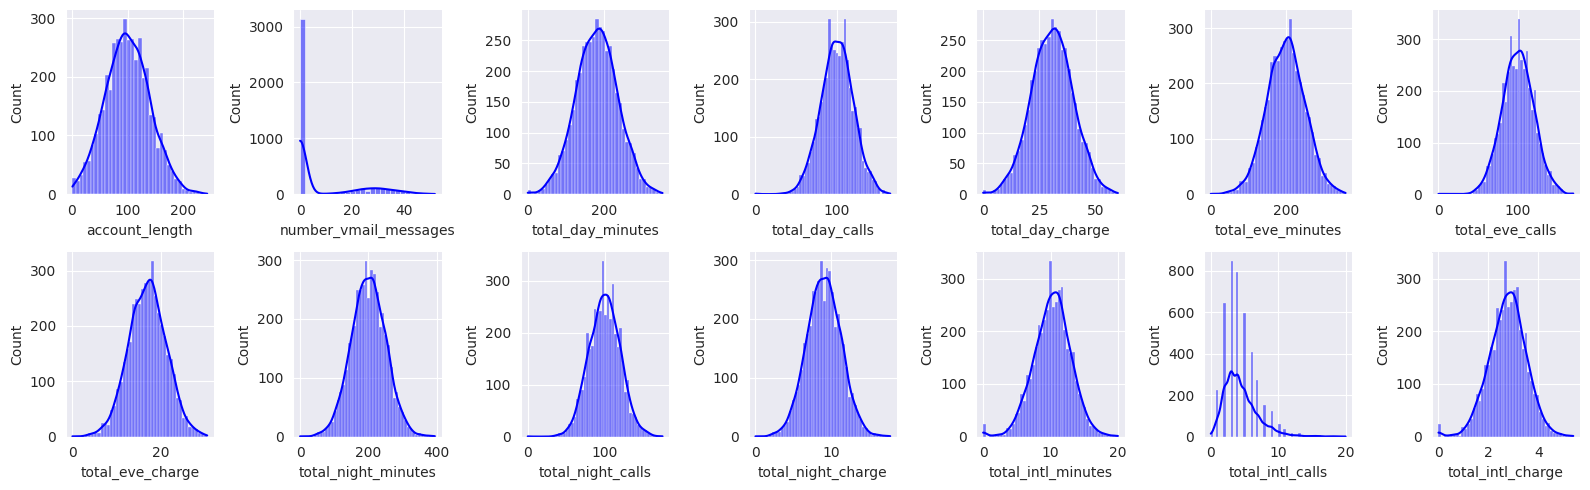

In [34]:
sns.set_style('darkgrid')
nums_col = int(len(nums) / 2)
fig, axes = plt.subplots(nrows=2, ncols=nums_col, figsize=(16, 5))
for i, ax in enumerate(axes.flat):
    if i < len(nums):
        sns.histplot(data=data, x=nums[i], ax=ax, color='blue', kde=True)
    else:
        ax.set_visible(False)
sns.despine()
plt.tight_layout()

Variabel charge dan min memiliki distribusi yang sama karena berkorelasi sempurna.

> Distribution plot categorical (opsional)

plot semua distribusi fitur kategorikal dengan % Churn per masing-masing kategori dan rata-rata

#### Bivariate Analysis

Setelah menilik setiap kolom secara individual, sekarang kita akan melihat hubungan antar kolom. Mengetahui hubungan antar kolom dapat membantu kita memilih fitur-fitur yang paling penting dan mengesampingkan *feature* yang redundan.

> Correlation heatmap & plot

In [35]:
corr=data.corr()
corr.style.background_gradient().format(precision=1)

Cukup jelas dari grafik bahwa ada hubungan linier yang sempurna antara Minutes dan Charges yang sesuai

<Axes: >

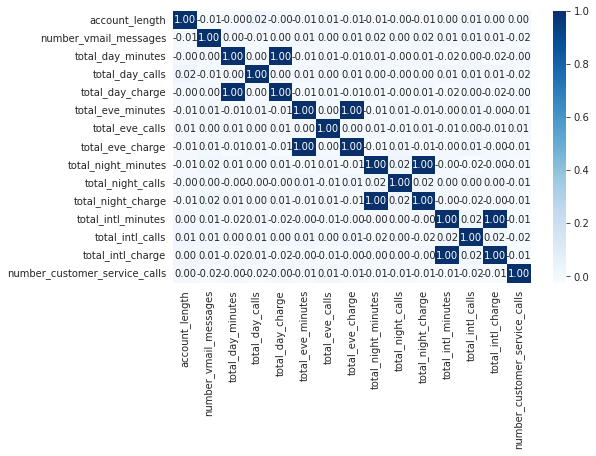

In [74]:
plt.figure(figsize=(8, 5))
sns.heatmap(data.corr(), cmap='Blues', annot=True, fmt='.2f')

#### Multivariate Analysis

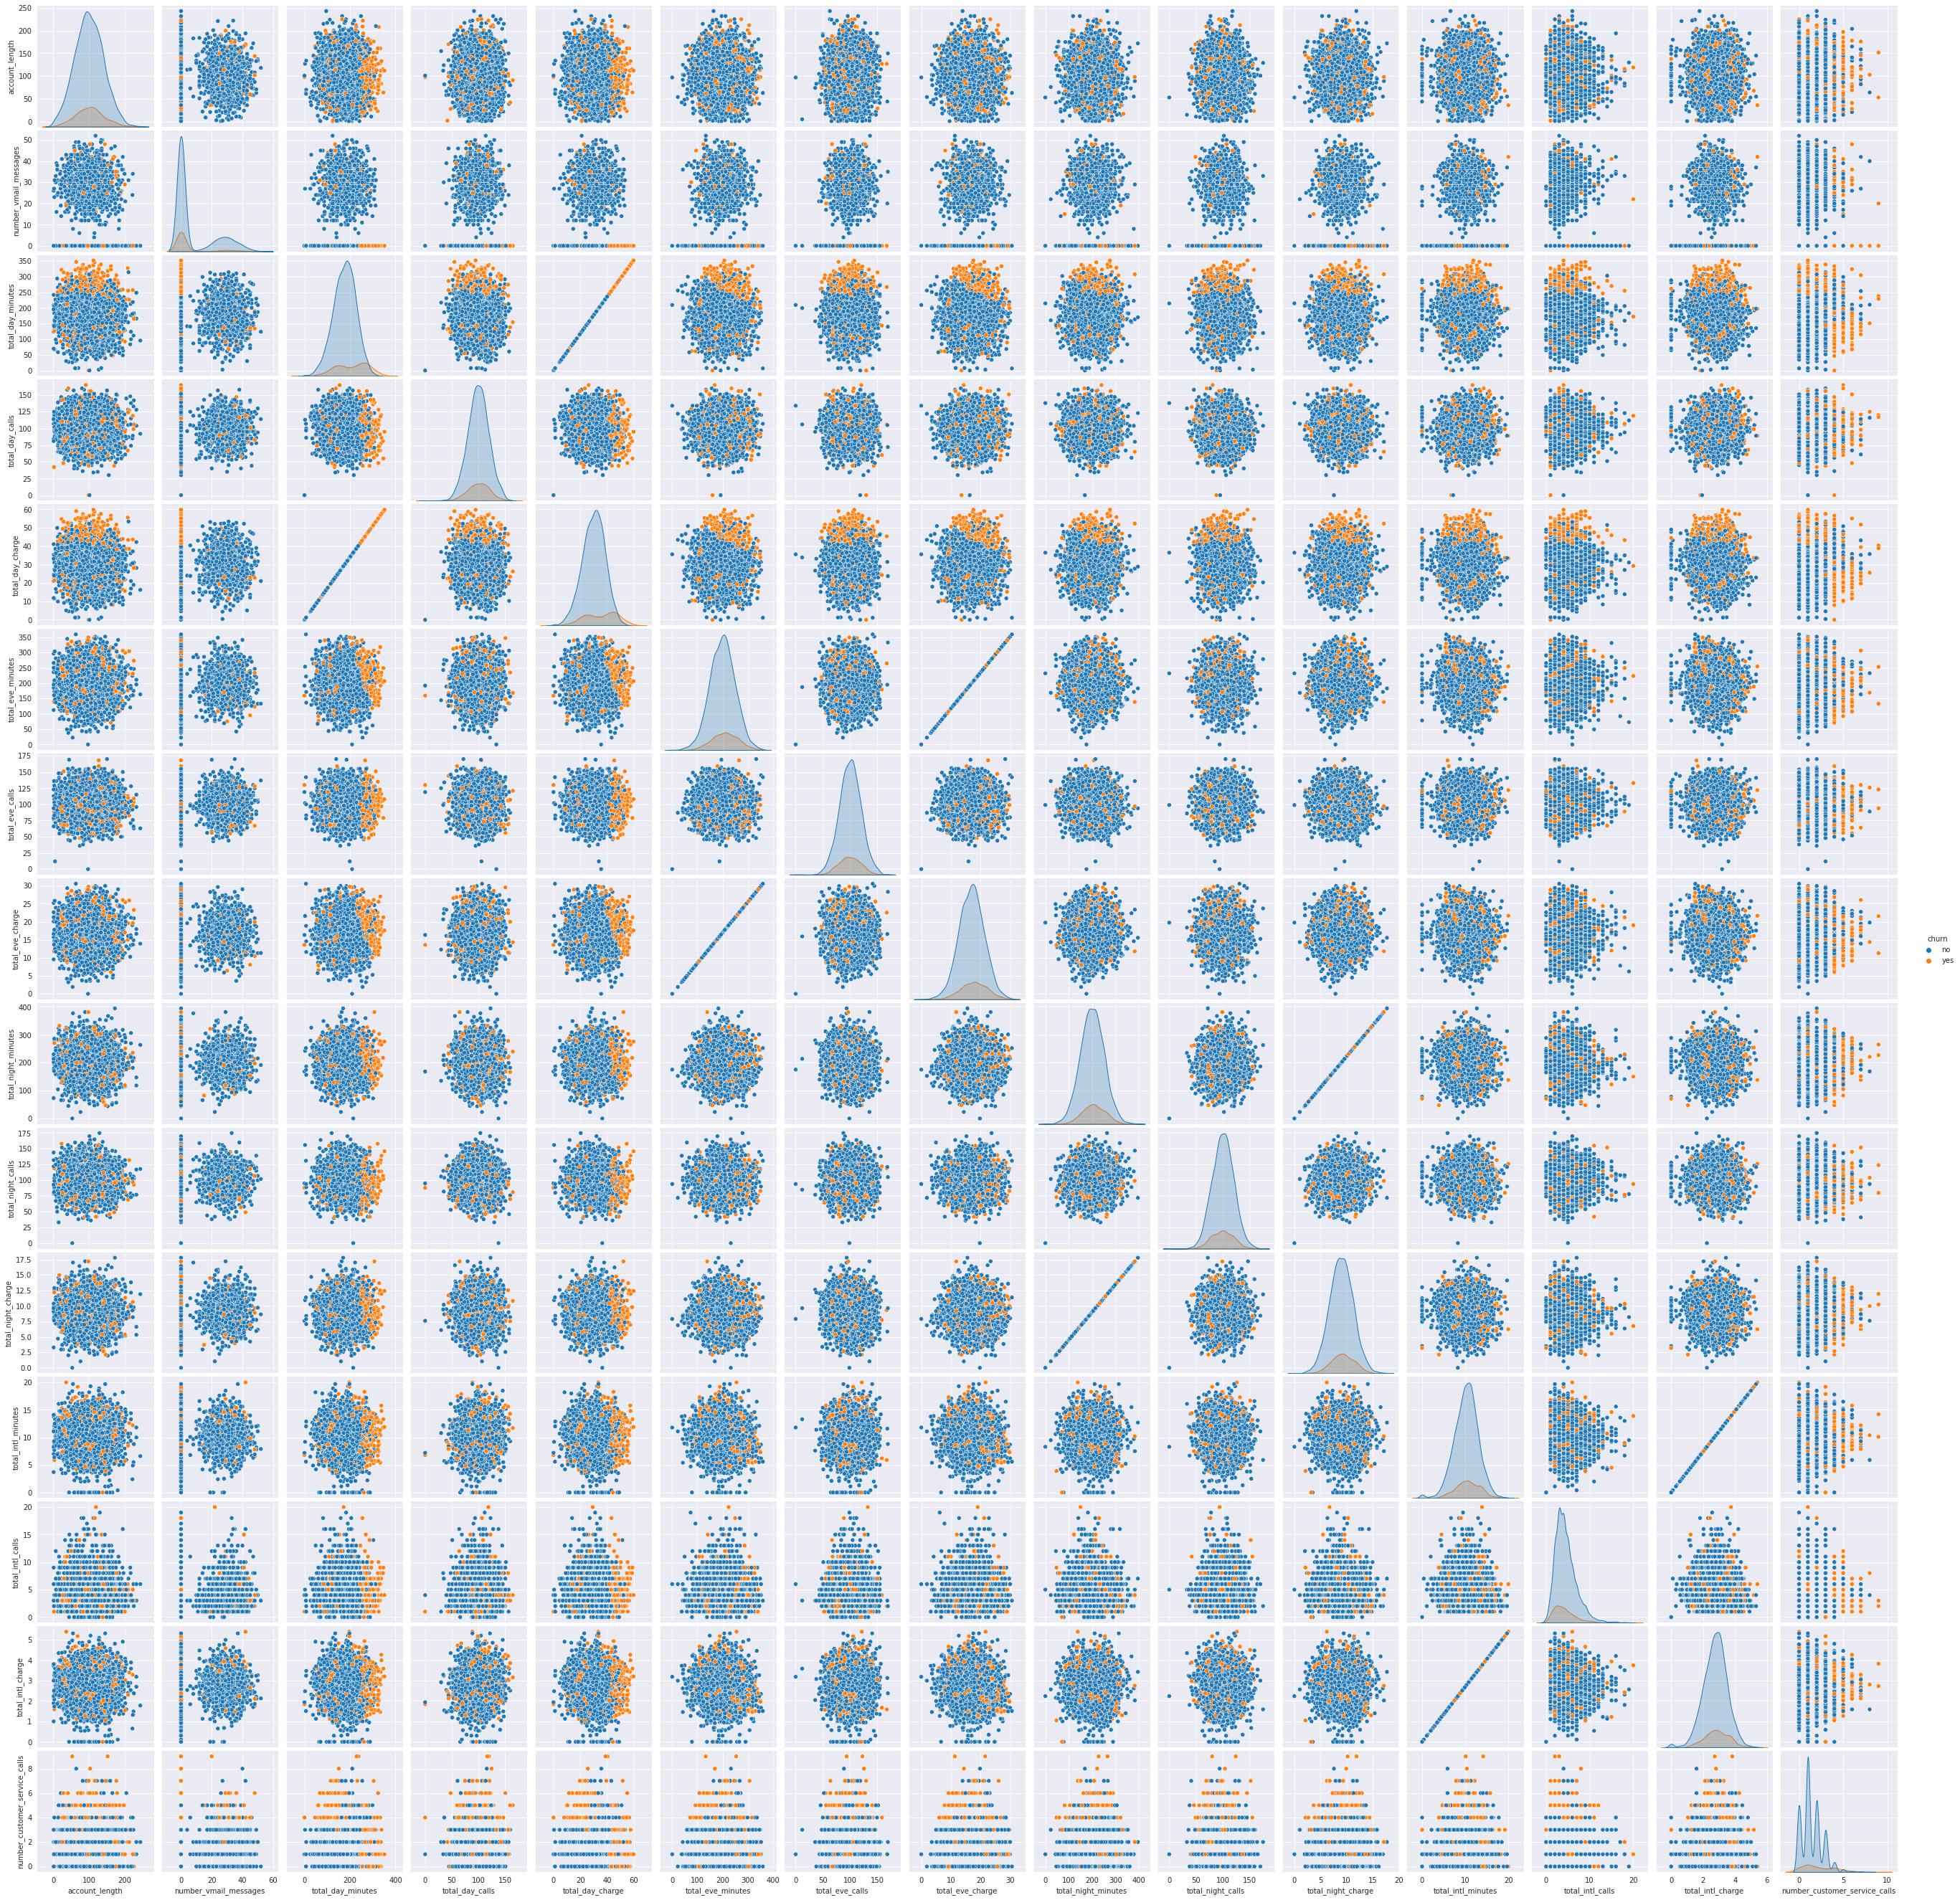

In [79]:
sns.pairplot(data=data, hue='churn')

### EDA Conclusion
* Kolom `area_code` dan/atau `state` bagian bersifat anomali, dan dapat dihilangkan.
* dari analisis bivariate kita dapat hitung `total_net_minutes` untuk mengurangi jumlah fitur; kita akan melakukan hal yang sama dengan `..call`, dan mengisi `..charge`
* keempat charge fields memilki korelasi linear pada minute fields.
* pelanggan dengan Paket Internasional cenderung lebih sering melakukan churn.
*  bahwa churn rate meningkat tajam mulai dari 4 panggilan ke pusat layanan. Pelanggan yang menelepon layanan pelanggan tiga kali atau lebih sedikit memiliki tingkat churn yang jauh lebih rendah daripada pelanggan yang menelepon layanan pelanggan empat kali atau lebih.
* tidak ada hubungan yang jelas antara churn dengan variabel lainnya

...


##Feature Extraction
Perhatikan fitur yang ada, pahami domain knowledge atau cari fitur potensial yang mungkin akan menjadi predictor yang tepat
Apa bila data masih kotor, agregasi dapat dilakukan

##Feature Selection
Untuk kasus linear, correlation analysis  dapat membantu melihat nilai korelasi
Pilih fitur dengan nilai variasi yang tinggi (tidak dominan pada 1 atau 2 value saja)
Opsi: ANOVA (feature categorical), SelectKbest (untuk melihat feature yg ber-impact), ValueInformation
Buang fitur yang tidak dibutuhkan

##Data Cleansing
Proses menyiapkan data hingga target dapat digunakan pada model dengan baik

In [105]:
def clean_Data(data):    
    #engineering hitung total_net_minutes untuk mengurangi jumlah fitur
    #juga pada ..calls dan ..charge
    data['total_net_minutes'] = data['total_day_minutes'] + data['total_eve_minutes'] + data['total_night_minutes']
    data['total_net_calls'] = data['total_day_calls'] + data['total_eve_calls'] + data['total_night_calls']
    data['total_net_charge'] = data['total_day_charge'] + data['total_eve_charge'] + data['total_night_charge']


    data['voice_mail_plan'] = data['voice_mail_plan'].map({'yes': 1, 'no': 0}) 
    data['international_plan'] = data['international_plan'].map({'yes': 1, 'no': 0}) 

    data.drop(columns= ['state', 'area_code'], inplace= True)
    #data.area_code = pd.Categorical(data.area_code).codes



    data.drop(columns=['total_day_charge', 'total_eve_charge','total_night_charge',
                    'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes', 
                     'total_eve_minutes', 'total_night_minutes'], inplace=True)
    return data

In [102]:
data.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

## Data Split (Supervised)
Lakukan train & test split pada keseluruhan dataset

* membagi kerangka data menjadi x, y
* train-test-spilt untuk membagi data
* gunakan `random_state` untuk memiliki data yang sama setiap kali menjalankan program
* gunakan stratifikasi untuk memotong data dengan porsi yang sama

In [103]:
from sklearn.model_selection import train_test_split 

X = data.drop(columns= ['churn'])
y = data['churn']

x_train, x_val, y_train, y_val = train_test_split(X, y , test_size=.25, stratify= y, random_state=1) 
y_train.value_counts(), y_val.value_counts()

(no     2739
 yes     448
 Name: churn, dtype: int64, no     913
 yes    150
 Name: churn, dtype: int64)

proses pemanggilan fungsi clean

In [104]:
x_train  = clean_Data(x_train)
y_train = pd.Categorical(y_train).codes

x_val  = clean_Data(x_val)
y_val= pd.Categorical(y_val).codes

print(data.international_plan.value_counts())
data.head()

no     3854
yes     396
Name: international_plan, dtype: int64


state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

Data Transformation 

Modeling & Evaluation 

Predicting the DataTest